# Workshop 1: Mean Squared Error

In [1]:
from sklearn.metrics import mean_squared_error

In [2]:
y_true = [0, 0, 1, 1]
y_pred = [0, 0, 0, 0]
mean_squared_error(y_true, y_pred)

0.5

In [3]:
y_true = [0, 0, 1, 1, 2.5, 2.4]
y_pred = [0, 0, 0, 0, 0.4, 1.1]
mean_squared_error(y_true, y_pred)

1.3499999999999999

# Workshop 2: หาค่า Loss ด้วย Binary Cross-entropy

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
y_true = [0, 0, 1, 1]
y_pred = [0, 0, 1, 1]

y_pred = np.array(y_pred).astype('float')

bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true, y_pred).numpy()

0.0

In [6]:
y_true = [0, 0, 1, 1]
y_pred = [1, 1, 0, 0]

y_pred = np.array(y_pred).astype('float')

bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true, y_pred).numpy()

15.424948470529964

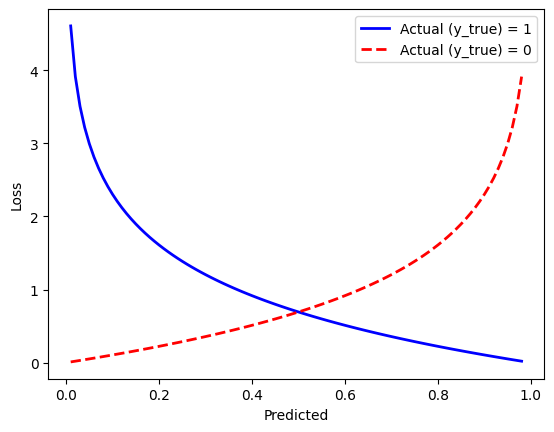

In [7]:
def cross_entropy_loss(yHat, y):
  if y == 1:
    return -np.log(yHat)
  else:
    return -np.log(1 - yHat)

y_pred = np.arange(0.01, 0.99, 0.01)

cost_1 = cross_entropy_loss(y_pred, 1)
cost_0 = cross_entropy_loss(y_pred, 0)

plt.plot(y_pred, cost_1, label='Actual (y_true) = 1', c='b', ls='-', lw=2)
plt.plot(y_pred, cost_0, label='Actual (y_true) = 0', c='r', ls='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

# Workshop 3: Sparse Categorical Cross-entropy

In [8]:
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.1, random_state=1)
X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])
df = pd.concat([X_df, y_df], axis=1)
target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat', 4:'dog'}
df['class'] = df['class'].map(target_map)

df.sample(5, random_state=100)

,weight,height,class
249,-11.889046,-3.890515,bird
353,-9.501477,-4.717762,bird
537,-3.277917,1.611778,dog
424,-9.297471,-2.403170,bird
564,-2.897847,0.377424,dog


In [10]:
class_names, y = np.unique(df['class'], return_inverse=True)
class_names, y

(array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object),
 array([3, 0, 1, 1, 2, 2, 3, 2, 2, 2, 2, 4, 4, 1, 0, 1, 4, 2, 2, 0, 1, 2,
        1, 4, 1, 3, 1, 2, 0, 1, 0, 3, 3, 1, 4, 2, 0, 0, 1, 0, 3, 4, 4, 4,
        2, 1, 3, 0, 3, 2, 1, 3, 0, 2, 0, 1, 0, 1, 4, 0, 2, 0, 1, 4, 4, 2,
        0, 4, 4, 2, 0, 3, 1, 2, 1, 3, 3, 2, 1, 0, 3, 1, 2, 0, 2, 2, 4, 3,
        3, 4, 0, 3, 3, 2, 4, 4, 2, 1, 2, 4, 3, 4, 2, 2, 1, 1, 4, 1, 4, 1,
        4, 1, 3, 1, 4, 3, 3, 4, 0, 4, 0, 3, 2, 4, 3, 2, 1, 2, 4, 2, 3, 4,
        2, 0, 2, 1, 2, 0, 1, 3, 1, 3, 0, 0, 0, 3, 0, 1, 2, 0, 0, 1, 4, 2,
        4, 1, 4, 0, 0, 2, 2, 3, 1, 0, 4, 0, 2, 1, 4, 0, 3, 2, 1, 1, 3, 3,
        0, 3, 1, 2, 0, 3, 0, 1, 0, 0, 1, 4, 1, 1, 3, 4, 4, 1, 3, 2, 0, 4,
        0, 0, 4, 3, 1, 1, 1, 3, 2, 1, 1, 4, 0, 4, 2, 4, 0, 0, 3, 1, 3, 4,
        3, 4, 3, 1, 3, 2, 4, 1, 4, 3, 0, 0, 0, 0, 2, 0, 4, 2, 4, 3, 2, 4,
        4, 3, 2, 4, 4, 3, 1, 0, 0, 4, 3, 2, 0, 4, 0, 3, 0, 4, 3, 1, 4, 1,
        0, 2, 0, 3, 3, 3, 3, 1, 4, 2, 1, 2, 1, 4,

In [11]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-7.253467,-7.947597
1,-12.447536,-5.822616
2,-5.973586,-3.275877
3,-5.310976,-2.953204
4,-1.860408,1.477063


In [12]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       [ 0.0185207 , -0.22299352]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

X_train.shape, X_test.shape

((750, 2), (250, 2))

In [14]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(2,)))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=0, validation_split=0.25)

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09914663434028625
Test accuracy: 0.9679999947547913


In [17]:
y_pred = model.predict(X_test)

y_pred[:4]
y_pred[:4].round(3)

8/8 [==============================] - 0s 3ms/step


array([[0.   , 0.   , 0.003, 0.   , 0.997],
       [0.   , 0.   , 0.01 , 0.   , 0.99 ],
       [0.   , 0.01 , 0.973, 0.   , 0.016],
       [0.001, 0.917, 0.004, 0.078, 0.   ]], dtype=float32)

In [18]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

array([4, 4, 2, 1])

# Workshop 4: Gradient Descent

In [19]:
from sklearn import linear_model

In [52]:
sns.set_style('darkgrid')
np.random.seed(seed=1)
x = np.random.uniform(0, 1, 12)

def f(x):
  return 2 * x + 0

noise = 0.15
noise = np.random.randn(x.shape[0]) * noise

y = f(x) + noise

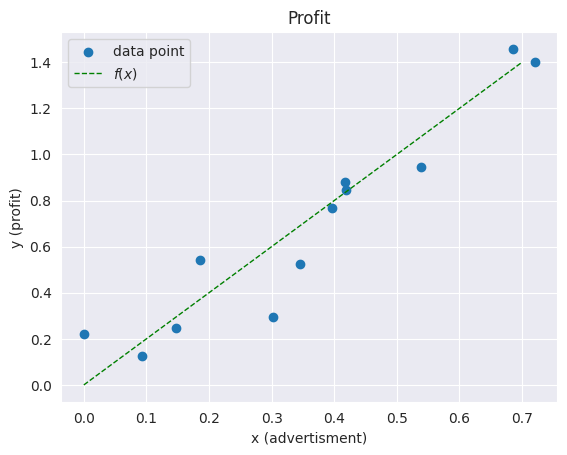

In [53]:
plt.scatter(x, y, marker='o', label='data point')
plt.plot([0, .7], [f(0), 1.4], 'g--', lw=1, label='$f(x)$')
plt.xlabel('x (advertisment)')
plt.ylabel('y (profit)')

plt.title('Profit')
plt.legend(loc=2)
plt.show()

[0.         0.08163265 0.16326531 0.24489796 0.32653061 0.40816327
 0.48979592 0.57142857 0.65306122 0.73469388 0.81632653 0.89795918
 0.97959184 1.06122449 1.14285714 1.2244898  1.30612245 1.3877551
 1.46938776 1.55102041 1.63265306 1.71428571 1.79591837 1.87755102
 1.95918367 2.04081633 2.12244898 2.20408163 2.28571429 2.36734694
 2.44897959 2.53061224 2.6122449  2.69387755 2.7755102  2.85714286
 2.93877551 3.02040816 3.10204082 3.18367347 3.26530612 3.34693878
 3.42857143 3.51020408 3.59183673 3.67346939 3.75510204 3.83673469
 3.91836735 4.        ]


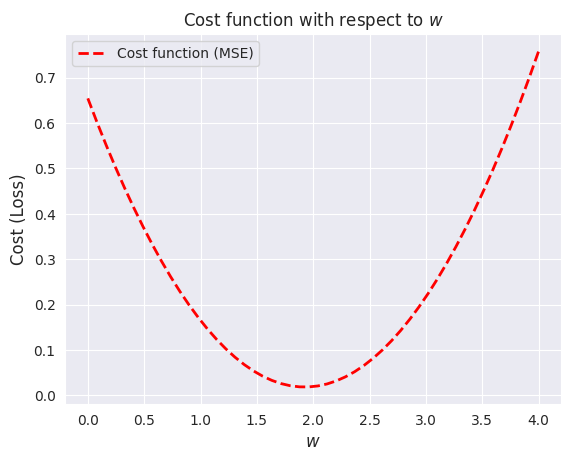

In [54]:
def neuron(x, w):
  return w * x + 0

def loss_mse(y_pred, y_true):
  return np.mean((y_true - y_pred) ** 2)

ws = np.linspace(0, 4, num=50)
print(ws)
loss_ws = [loss_mse(neuron(x, w), y) for w in ws]

plt.plot(ws, loss_ws, 'r--', lw=2, label='Cost function (MSE)')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Cost function with respect to $w$')
plt.legend()
plt.show()

In [55]:
lm = linear_model.LinearRegression()
X = x.reshape(-1, 1)
lm.fit(X, y)

print(lm.coef_, lm.intercept_)

[1.87331728] 0.02454657084406986


In [56]:
def f(x):
  return 3 * x + 0

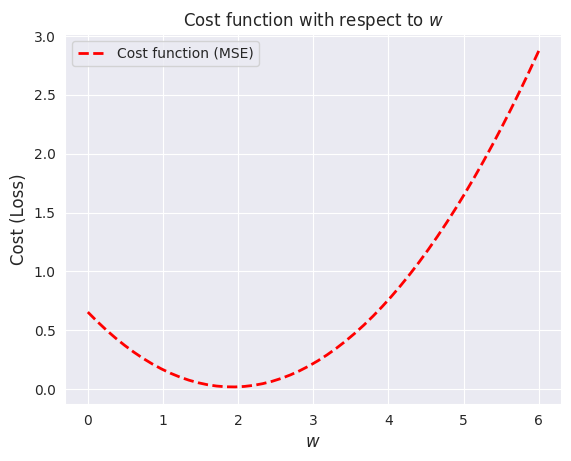

In [57]:
def neuron(x, w):
  return w * x + 0

def loss_mse(y_pred, y_true):
  return np.mean((y_true - y_pred) ** 2)

ws = np.linspace(0, 6, num=50)
loss_ws = [loss_mse(neuron(x, w), y) for w in ws]

plt.plot(ws, loss_ws, 'r--', lw=2, label='Cost function (MSE)')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Cost function with respect to $w$')
plt.legend()
plt.show()

In [58]:
def f(x):
  return 2 * x + 0

In [59]:
def gradient(w, x, y_true):
  y_pred = neuron(x, w)
  return 2 * x * (y_pred - y_true)

def delta_w(w_k, x, y, learning_rate):
  return learning_rate * np.mean(gradient(w_k, x, y))

w = .8
learning_rate = .9
no_of_iterations = 22

history_loss = [(w, loss_mse(neuron(x, w), y))]
for i in range(no_of_iterations):
  dw = delta_w(w, x, y, learning_rate)
  w = w - dw
  history_loss.append((w, loss_mse(neuron(x, w), y)))

for i in range(0, len(history_loss)):
  print('{} -> w: {:.2f} \t loss: {}'.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 0.80 	 loss: 0.2355666745580068
1 -> w: 1.15 	 loss: 0.12212153393660337
2 -> w: 1.39 	 loss: 0.06798528946080598
3 -> w: 1.55 	 loss: 0.042151367003748656
4 -> w: 1.67 	 loss: 0.029823368340752682
5 -> w: 1.75 	 loss: 0.023940423105182698
6 -> w: 1.80 	 loss: 0.021133070055364574
7 -> w: 1.84 	 loss: 0.019793395652368095
8 -> w: 1.87 	 loss: 0.019154100389465464
9 -> w: 1.88 	 loss: 0.018849027431248465
10 -> w: 1.90 	 loss: 0.018703446014904625
11 -> w: 1.90 	 loss: 0.01863397427637838
12 -> w: 1.91 	 loss: 0.018600822225965163
13 -> w: 1.91 	 loss: 0.018585002002232242
14 -> w: 1.92 	 loss: 0.01857745256031717
15 -> w: 1.92 	 loss: 0.018573849951770596
16 -> w: 1.92 	 loss: 0.018572130779878706
17 -> w: 1.92 	 loss: 0.018571310387666885
18 -> w: 1.92 	 loss: 0.01857091889488806
19 -> w: 1.92 	 loss: 0.018570732073763172
20 -> w: 1.92 	 loss: 0.01857064292235452
21 -> w: 1.92 	 loss: 0.018570600379126785
22 -> w: 1.92 	 loss: 0.018570580077414727


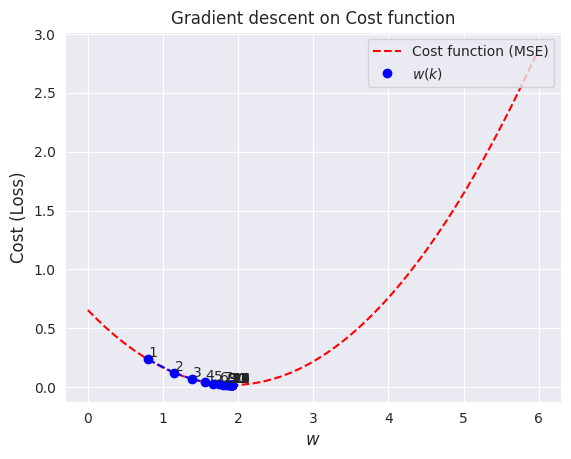

In [60]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)')
for i in range(0, len(history_loss) - 1):
  w1, c1 = history_loss[i]
  w2, c2 = history_loss[i + 1]
  plt.plot(w1, c1, 'bo')
  plt.plot([w1, w2], [c1, c2], 'b--')
  plt.text(w1, c1+0.02, f'${i+1}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')
plt.legend(loc=1)
plt.show()

# Workshop 5: จำนวนรอบการทำ Gradient Descent

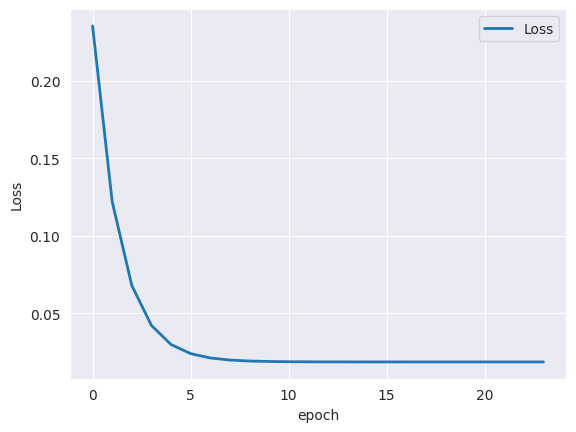

In [61]:
epoch = np.linspace(0, len(history_loss), num=len(history_loss)).astype('int')
step_loss = [ls[1] for ls in history_loss]

plt.plot(epoch, step_loss, lw=2, label='Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Workshop 6: ความเร็วการเรียนรู้ Learning Rate

In [62]:
def gradient(w, x, y_true):
  y_pred = neuron(x, w)
  return 2 * x * (y_pred - y_true)

def delta_w(w_k, x, y, learning_rate):
  return learning_rate * np.mean(gradient(w_k, x, y))

w = .8
learning_rate = .17
no_of_iterations = 22

history_loss = [(w, loss_mse(neuron(x, w), y))]
for i in range(no_of_iterations):
  dw = delta_w(w, x, y, learning_rate)
  w = w - dw
  history_loss.append((w, loss_mse(neuron(x, w), y)))

for i in range(0, len(history_loss)):
  print('{} -> w: {:.2f} \t loss: {}'.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 0.80 	 loss: 0.2355666745580068
1 -> w: 0.87 	 loss: 0.21095964138926426
2 -> w: 0.93 	 loss: 0.18914300880864196
3 -> w: 0.99 	 loss: 0.16980034958215406
4 -> w: 1.04 	 loss: 0.1526511188487021
5 -> w: 1.09 	 loss: 0.13744658511290445
6 -> w: 1.14 	 loss: 0.12396622265722508
7 -> w: 1.19 	 loss: 0.11201451304914634
8 -> w: 1.23 	 loss: 0.10141810935262252
9 -> w: 1.27 	 loss: 0.09202332191369363
10 -> w: 1.31 	 loss: 0.08369388925423292
11 -> w: 1.34 	 loss: 0.07630900174299396
12 -> w: 1.38 	 loss: 0.0697615493793915
13 -> w: 1.41 	 loss: 0.06395656827596896
14 -> w: 1.44 	 loss: 0.0588098633074197
15 -> w: 1.47 	 loss: 0.05424678694913957
16 -> w: 1.49 	 loss: 0.05020115659365332
17 -> w: 1.52 	 loss: 0.0466142946417309
18 -> w: 1.54 	 loss: 0.04343417744572908
19 -> w: 1.57 	 loss: 0.040614680761479435
20 -> w: 1.59 	 loss: 0.0381149107647984
21 -> w: 1.61 	 loss: 0.03589861092971998
22 -> w: 1.62 	 loss: 0.033933636165845556


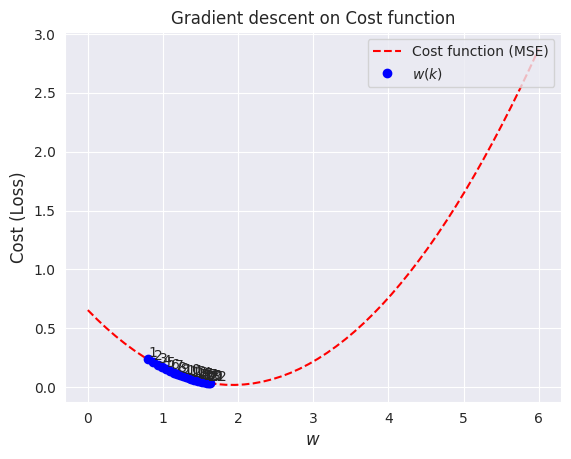

In [63]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)')
for i in range(0, len(history_loss) - 1):
  w1, c1 = history_loss[i]
  w2, c2 = history_loss[i + 1]
  plt.plot(w1, c1, 'bo')
  plt.plot([w1, w2], [c1, c2], 'b--')
  plt.text(w1, c1+0.02, f'${i+1}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')
plt.legend(loc=1)
plt.show()

In [73]:
def gradient(w, x, y_true):
  y_pred = neuron(x, w)
  return 2 * x * (y_pred - y_true)

def delta_w(w_k, x, y, learning_rate):
  return learning_rate * np.mean(gradient(w_k, x, y))

w = .8
learning_rate = 5
no_of_iterations = 5

history_loss = [(w, loss_mse(neuron(x, w), y))]
for i in range(no_of_iterations):
  dw = delta_w(w, x, y, learning_rate)
  w = w - dw
  history_loss.append((w, loss_mse(neuron(x, w), y)))

for i in range(0, len(history_loss)):
  print('{} -> w: {:.2f} \t loss: {}'.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 0.80 	 loss: 0.2355666745580068
1 -> w: 2.73 	 loss: 0.13037137634086873
2 -> w: 1.34 	 loss: 0.07617261724789874
3 -> w: 2.34 	 loss: 0.04824831324379423
4 -> w: 1.63 	 loss: 0.03386114336826127
5 -> w: 2.14 	 loss: 0.026448580570025807


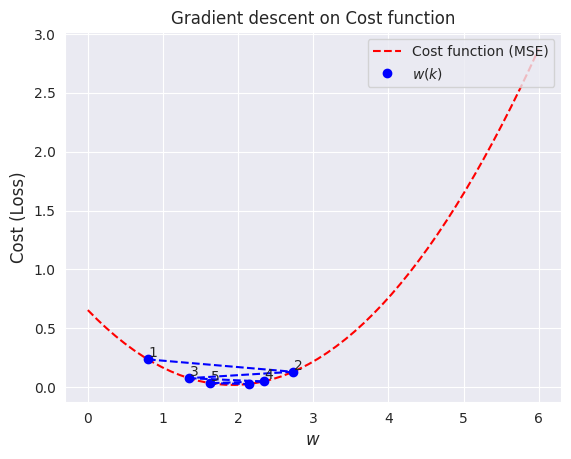

In [74]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)')
for i in range(0, len(history_loss) - 1):
  w1, c1 = history_loss[i]
  w2, c2 = history_loss[i + 1]
  plt.plot(w1, c1, 'bo')
  plt.plot([w1, w2], [c1, c2], 'b--')
  plt.text(w1, c1+0.02, f'${i+1}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')
plt.legend(loc=1)
plt.show()

# Workshop 7: เริ่มต้นด้วยค่า Weight ใดๆ

In [78]:
w = 3.7
learning_rate = .9

In [79]:
def gradient(w, x, y_true):
  y_pred = neuron(x, w)
  return 2 * x * (y_pred - y_true)

def delta_w(w_k, x, y, learning_rate):
  return learning_rate * np.mean(gradient(w_k, x, y))

no_of_iterations = 5

history_loss = [(w, loss_mse(neuron(x, w), y))]
for i in range(no_of_iterations):
  dw = delta_w(w, x, y, learning_rate)
  w = w - dw
  history_loss.append((w, loss_mse(neuron(x, w), y)))

for i in range(0, len(history_loss)):
  print('{} -> w: {:.2f} \t loss: {}'.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 3.70 	 loss: 0.5604310587397846
1 -> w: 3.15 	 loss: 0.27714745771976795
2 -> w: 2.77 	 loss: 0.14196396553314475
3 -> w: 2.51 	 loss: 0.07745413688803532
4 -> w: 2.33 	 loss: 0.0466699196399979
5 -> w: 2.20 	 loss: 0.0319796305557126


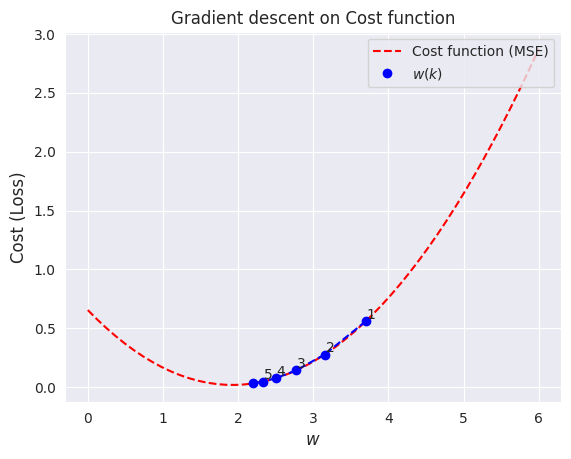

In [80]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)')
for i in range(0, len(history_loss) - 1):
  w1, c1 = history_loss[i]
  w2, c2 = history_loss[i + 1]
  plt.plot(w1, c1, 'bo')
  plt.plot([w1, w2], [c1, c2], 'b--')
  plt.text(w1, c1+0.02, f'${i+1}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')
plt.legend(loc=1)
plt.show()

# Workshop 8: SDG มี Momentum

In [81]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.1, random_state=1)
X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])
df = pd.concat([X_df, y_df], axis=1)
target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat', 4:'dog'}
df['class'] = df['class'].map(target_map)

df.sample(5, random_state=100)

,weight,height,class
249,-11.889046,-3.890515,bird
353,-9.501477,-4.717762,bird
537,-3.277917,1.611778,dog
424,-9.297471,-2.403170,bird
564,-2.897847,0.377424,dog


In [82]:
class_names, y = np.unique(df['class'], return_inverse=True)
class_names, y

(array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object),
 array([3, 0, 1, 1, 2, 2, 3, 2, 2, 2, 2, 4, 4, 1, 0, 1, 4, 2, 2, 0, 1, 2,
        1, 4, 1, 3, 1, 2, 0, 1, 0, 3, 3, 1, 4, 2, 0, 0, 1, 0, 3, 4, 4, 4,
        2, 1, 3, 0, 3, 2, 1, 3, 0, 2, 0, 1, 0, 1, 4, 0, 2, 0, 1, 4, 4, 2,
        0, 4, 4, 2, 0, 3, 1, 2, 1, 3, 3, 2, 1, 0, 3, 1, 2, 0, 2, 2, 4, 3,
        3, 4, 0, 3, 3, 2, 4, 4, 2, 1, 2, 4, 3, 4, 2, 2, 1, 1, 4, 1, 4, 1,
        4, 1, 3, 1, 4, 3, 3, 4, 0, 4, 0, 3, 2, 4, 3, 2, 1, 2, 4, 2, 3, 4,
        2, 0, 2, 1, 2, 0, 1, 3, 1, 3, 0, 0, 0, 3, 0, 1, 2, 0, 0, 1, 4, 2,
        4, 1, 4, 0, 0, 2, 2, 3, 1, 0, 4, 0, 2, 1, 4, 0, 3, 2, 1, 1, 3, 3,
        0, 3, 1, 2, 0, 3, 0, 1, 0, 0, 1, 4, 1, 1, 3, 4, 4, 1, 3, 2, 0, 4,
        0, 0, 4, 3, 1, 1, 1, 3, 2, 1, 1, 4, 0, 4, 2, 4, 0, 0, 3, 1, 3, 4,
        3, 4, 3, 1, 3, 2, 4, 1, 4, 3, 0, 0, 0, 0, 2, 0, 4, 2, 4, 3, 2, 4,
        4, 3, 2, 4, 4, 3, 1, 0, 0, 4, 3, 2, 0, 4, 0, 3, 0, 4, 3, 1, 4, 1,
        0, 2, 0, 3, 3, 3, 3, 1, 4, 2, 1, 2, 1, 4,

In [83]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-7.253467,-7.947597
1,-12.447536,-5.822616
2,-5.973586,-3.275877
3,-5.310976,-2.953204
4,-1.860408,1.477063


In [84]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       [ 0.0185207 , -0.22299352]])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

X_train.shape, X_test.shape

((750, 2), (250, 2))

In [98]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(2,)))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               300       
                                                                 
 dense_7 (Dense)             (None, 5)                 505       
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [92]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [93]:
model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=0, validation_split=0.25)

In [94]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1379225105047226
Test accuracy: 0.9679999947547913


In [99]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [100]:
model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=0, validation_split=0.25)

In [101]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15985225141048431
Test accuracy: 0.9679999947547913


# Workshop 9: ไม่มี Regularization

In [103]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.5, random_state=1)
X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])
df = pd.concat([X_df, y_df], axis=1)
target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat', 4:'dog'}
df['class'] = df['class'].map(target_map)

df.sample(5, random_state=100)

,weight,height,class
249,-12.576804,-3.867667,bird
353,-9.321028,-4.995730,bird
537,-3.719105,1.915575,dog
424,-9.042837,-1.839468,bird
564,-3.200827,0.232366,dog


In [104]:
class_names, y = np.unique(df['class'], return_inverse=True)
class_names, y

(array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object),
 array([3, 0, 1, 1, 2, 2, 3, 2, 2, 2, 2, 4, 4, 1, 0, 1, 4, 2, 2, 0, 1, 2,
        1, 4, 1, 3, 1, 2, 0, 1, 0, 3, 3, 1, 4, 2, 0, 0, 1, 0, 3, 4, 4, 4,
        2, 1, 3, 0, 3, 2, 1, 3, 0, 2, 0, 1, 0, 1, 4, 0, 2, 0, 1, 4, 4, 2,
        0, 4, 4, 2, 0, 3, 1, 2, 1, 3, 3, 2, 1, 0, 3, 1, 2, 0, 2, 2, 4, 3,
        3, 4, 0, 3, 3, 2, 4, 4, 2, 1, 2, 4, 3, 4, 2, 2, 1, 1, 4, 1, 4, 1,
        4, 1, 3, 1, 4, 3, 3, 4, 0, 4, 0, 3, 2, 4, 3, 2, 1, 2, 4, 2, 3, 4,
        2, 0, 2, 1, 2, 0, 1, 3, 1, 3, 0, 0, 0, 3, 0, 1, 2, 0, 0, 1, 4, 2,
        4, 1, 4, 0, 0, 2, 2, 3, 1, 0, 4, 0, 2, 1, 4, 0, 3, 2, 1, 1, 3, 3,
        0, 3, 1, 2, 0, 3, 0, 1, 0, 0, 1, 4, 1, 1, 3, 4, 4, 1, 3, 2, 0, 4,
        0, 0, 4, 3, 1, 1, 1, 3, 2, 1, 1, 4, 0, 4, 2, 4, 0, 0, 3, 1, 3, 4,
        3, 4, 3, 1, 3, 2, 4, 1, 4, 3, 0, 0, 0, 0, 2, 0, 4, 2, 4, 3, 2, 4,
        4, 3, 2, 4, 4, 3, 1, 0, 0, 4, 3, 2, 0, 4, 0, 3, 0, 4, 3, 1, 4, 1,
        0, 2, 0, 3, 3, 3, 3, 1, 4, 2, 1, 2, 1, 4,

In [105]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-7.322044,-7.872823
1,-13.338381,-6.502349
2,-5.864055,-3.343911
3,-4.960496,-2.903902
4,-1.786137,1.731873


In [106]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.55772953, -1.30598376],
       [-2.26705267, -1.00347633],
       [-0.14349512, -0.30630781],
       [ 0.1132183 , -0.20918383]])

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

X_train.shape, X_test.shape

((750, 2), (250, 2))

In [111]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(2,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               768       
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 5)                 325       
                                                                 
Total params: 42,245
Trainable params: 42,245
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=1, validation_split=0.25)

Epoch 1/1000
3/3 [==============================] - 1s 122ms/step - loss: 1.6226 - accuracy: 0.1957 - val_loss: 1.5179 - val_accuracy: 0.6330
Epoch 2/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.4976 - accuracy: 0.6299 - val_loss: 1.4129 - val_accuracy: 0.6968
Epoch 3/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.3974 - accuracy: 0.6744 - val_loss: 1.3096 - val_accuracy: 0.6968
Epoch 4/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.2971 - accuracy: 0.6833 - val_loss: 1.1997 - val_accuracy: 0.6968
Epoch 5/1000
3/3 [==============================] - 0s 31ms/step - loss: 1.1895 - accuracy: 0.6655 - val_loss: 1.0884 - val_accuracy: 0.7021
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.0798 - accuracy: 0.6726 - val_loss: 0.9846 - val_accuracy: 0.7021
Epoch 7/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.9755 - accuracy: 0.6833 - val_loss: 0.8947 - val_accuracy: 0.6968
Epoch 8/1000

In [110]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2799414098262787
Test accuracy: 0.8960000276565552


# Workshop 10: Regularization L1

In [113]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [125]:
model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.001), input_shape=(2,)))
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=1, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/1000
3/3 [==============================] - 2s 198ms/step - loss: 4.3454 - accuracy: 0.4227 - val_loss: 4.2271 - val_accuracy: 0.5960
Epoch 2/1000
3/3 [==============================] - 0s 41ms/step - loss: 4.1683 - accuracy: 0.6347 - val_loss: 4.0575 - val_accuracy: 0.6400
Epoch 3/1000
3/3 [==============================] - 0s 40ms/step - loss: 3.9944 - accuracy: 0.6493 - val_loss: 3.8856 - val_accuracy: 0.6400
Epoch 4/1000
3/3 [==============================] - 0s 41ms/step - loss: 3.8207 - accuracy: 0.6560 - val_loss: 3.7152 - val_accuracy: 0.6480
Epoch 5/1000
3/3 [==============================] - 0s 44ms/step - loss: 3.6498 - accuracy: 0.6667 - val_loss: 3.5508 - val_accuracy: 0.6480
Epoch 6/1000
3/3 [==============================] - 0s 38ms/step - loss: 3.4853 - accuracy: 0.6667 - val_loss: 3.3946 - val_accuracy: 0.6520
Epoch 7/1000
3/3 [==============================] - 0s 32ms/step - loss: 3.3284 - accuracy: 0.6707 - val_loss: 3.2495 - val_accuracy: 0.6640
Epoch 8/1000

# Workshop 11: Regularization L2

In [126]:
model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(2,)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=1, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/1000
3/3 [==============================] - 2s 122ms/step - loss: 1.8406 - accuracy: 0.1627 - val_loss: 1.7411 - val_accuracy: 0.3880
Epoch 2/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.7001 - accuracy: 0.5000 - val_loss: 1.6176 - val_accuracy: 0.5840
Epoch 3/1000
3/3 [==============================] - 0s 29ms/step - loss: 1.5778 - accuracy: 0.5947 - val_loss: 1.4964 - val_accuracy: 0.5840
Epoch 4/1000
3/3 [==============================] - 0s 31ms/step - loss: 1.4599 - accuracy: 0.6040 - val_loss: 1.3818 - val_accuracy: 0.6080
Epoch 5/1000
3/3 [==============================] - 0s 34ms/step - loss: 1.3469 - accuracy: 0.6280 - val_loss: 1.2729 - val_accuracy: 0.6160
Epoch 6/1000
3/3 [==============================] - 0s 34ms/step - loss: 1.2412 - accuracy: 0.6400 - val_loss: 1.1719 - val_accuracy: 0.6360
Epoch 7/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.1419 - accuracy: 0.6533 - val_loss: 1.0837 - val_accuracy: 0.6520
Epoch 8/1000

In [127]:
model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=1, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/1000
3/3 [==============================] - 2s 174ms/step - loss: 4.1168 - accuracy: 0.3267 - val_loss: 3.9530 - val_accuracy: 0.5800
Epoch 2/1000
3/3 [==============================] - 0s 43ms/step - loss: 3.8822 - accuracy: 0.5880 - val_loss: 3.7360 - val_accuracy: 0.5800
Epoch 3/1000
3/3 [==============================] - 0s 22ms/step - loss: 3.6720 - accuracy: 0.6000 - val_loss: 3.5341 - val_accuracy: 0.5920
Epoch 4/1000
3/3 [==============================] - 0s 23ms/step - loss: 3.4709 - accuracy: 0.6267 - val_loss: 3.3423 - val_accuracy: 0.6080
Epoch 5/1000
3/3 [==============================] - 0s 21ms/step - loss: 3.2810 - accuracy: 0.6360 - val_loss: 3.1602 - val_accuracy: 0.6080
Epoch 6/1000
3/3 [==============================] - 0s 31ms/step - loss: 3.0986 - accuracy: 0.6307 - val_loss: 2.9909 - val_accuracy: 0.5960
Epoch 7/1000
3/3 [==============================] - 0s 22ms/step - loss: 2.9298 - accuracy: 0.6267 - val_loss: 2.8355 - val_accuracy: 0.5920
Epoch 8/1000

In [128]:
model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.1), input_shape=(2,)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.1)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.1)))

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=1, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/1000
3/3 [==============================] - 1s 120ms/step - loss: 27.0543 - accuracy: 0.2213 - val_loss: 25.9322 - val_accuracy: 0.4880
Epoch 2/1000
3/3 [==============================] - 0s 19ms/step - loss: 25.4045 - accuracy: 0.5613 - val_loss: 24.3402 - val_accuracy: 0.6320
Epoch 3/1000
3/3 [==============================] - 0s 20ms/step - loss: 23.8417 - accuracy: 0.6493 - val_loss: 22.8327 - val_accuracy: 0.6400
Epoch 4/1000
3/3 [==============================] - 0s 22ms/step - loss: 22.3613 - accuracy: 0.6147 - val_loss: 21.4054 - val_accuracy: 0.5800
Epoch 5/1000
3/3 [==============================] - 0s 22ms/step - loss: 20.9598 - accuracy: 0.5947 - val_loss: 20.0562 - val_accuracy: 0.5800
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 19.6361 - accuracy: 0.5813 - val_loss: 18.7829 - val_accuracy: 0.5760
Epoch 7/1000
3/3 [==============================] - 0s 20ms/step - loss: 18.3880 - accuracy: 0.5813 - val_loss: 17.5840 - val_accuracy: 0.572

# Workshop 12: Dropout

In [118]:
from tensorflow.keras.layers import Dense, Dropout

In [129]:
model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))
model.add(Dropout(.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=1, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/1000
3/3 [==============================] - 1s 122ms/step - loss: 4.1246 - accuracy: 0.2427 - val_loss: 3.9681 - val_accuracy: 0.5880
Epoch 2/1000
3/3 [==============================] - 0s 32ms/step - loss: 3.9187 - accuracy: 0.3560 - val_loss: 3.7633 - val_accuracy: 0.5840
Epoch 3/1000
3/3 [==============================] - 0s 24ms/step - loss: 3.7389 - accuracy: 0.3840 - val_loss: 3.5648 - val_accuracy: 0.5400
Epoch 4/1000
3/3 [==============================] - 0s 28ms/step - loss: 3.5415 - accuracy: 0.5080 - val_loss: 3.3742 - val_accuracy: 0.5360
Epoch 5/1000
3/3 [==============================] - 0s 33ms/step - loss: 3.3767 - accuracy: 0.4827 - val_loss: 3.1960 - val_accuracy: 0.5440
Epoch 6/1000
3/3 [==============================] - 0s 34ms/step - loss: 3.2250 - accuracy: 0.4733 - val_loss: 3.0328 - val_accuracy: 0.5520
Epoch 7/1000
3/3 [==============================] - 0s 33ms/step - loss: 3.0441 - accuracy: 0.5200 - val_loss: 2.8820 - val_accuracy: 0.5640
Epoch 8/1000

# Workshop 13: Early Stopping

In [121]:
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=20)

In [130]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(2,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [131]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=1, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/1000
3/3 [==============================] - 1s 117ms/step - loss: 1.5795 - accuracy: 0.3507 - val_loss: 1.4944 - val_accuracy: 0.5680
Epoch 2/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.4672 - accuracy: 0.6107 - val_loss: 1.3877 - val_accuracy: 0.5960
Epoch 3/1000
3/3 [==============================] - 0s 26ms/step - loss: 1.3623 - accuracy: 0.6187 - val_loss: 1.2780 - val_accuracy: 0.6080
Epoch 4/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.2527 - accuracy: 0.6187 - val_loss: 1.1650 - val_accuracy: 0.6120
Epoch 5/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.1422 - accuracy: 0.6200 - val_loss: 1.0585 - val_accuracy: 0.6120
Epoch 6/1000
3/3 [==============================] - 0s 31ms/step - loss: 1.0420 - accuracy: 0.6347 - val_loss: 0.9606 - val_accuracy: 0.6360
Epoch 7/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.9448 - accuracy: 0.6667 - val_loss: 0.8760 - val_accuracy: 0.6680
Epoch 8/1000

In [132]:
train_score = model.evaluate(X_train, y_train, verbose=1)
test_score = model.evaluate(X_test, y_test, verbose=1)
print('Train: {:.3f}, Test: {:.3f}'.format(train_score[1], test_score[1]))

8/8 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.8920
Train: 0.879, Test: 0.892


# Workshop 14: Model Checkpoint

In [133]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [134]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [135]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(2,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [136]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=1, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/1000
1/3 [=========>....................] - ETA: 1s - loss: 1.5906 - accuracy: 0.3203
Epoch 1: val_accuracy improved from -inf to 0.56800, saving model to best_model.h5
3/3 [==============================] - 1s 131ms/step - loss: 1.5405 - accuracy: 0.4387 - val_loss: 1.4469 - val_accuracy: 0.5680
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4629 - accuracy: 0.5859
Epoch 2: val_accuracy did not improve from 0.56800
3/3 [==============================] - 0s 36ms/step - loss: 1.4172 - accuracy: 0.5747 - val_loss: 1.3353 - val_accuracy: 0.5680
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3235 - accuracy: 0.6250
Epoch 3: val_accuracy improved from 0.56800 to 0.57200, saving model to best_model.h5
3/3 [==============================] - 0s 44ms/step - loss: 1.3072 - accuracy: 0.5747 - val_loss: 1.2225 - val_accuracy: 0.5720
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2501 - accuracy: 0.5469
Epoch 4: val_accura